## Упражнение 10



Запишем уравнение (2) в виде системы уравнений первого порядка:

\begin{equation*}
 \begin{cases}
   y_2'(x) = a^2 y_1(x)
   \\
   y_2(0) = -a
   \\
   y_1'(x) = y_2(x)
   \\
   y_1(0) = 1
 \end{cases}
\end{equation*}

Методом Эйлера найдём значения $y_1$ в узлах.

In [74]:
import numpy as np
import pylab
import math

def euler_method(N, a, T):
    h = T / N
    xs = [0]
    y1s = [1]
    y2s = [-a]
    
    for i in range(1, N + 1):
        xs.append(xs[i - 1] + h)
        y1s.append(y1s[i - 1] + h * y2s[i - 1])
        y2s.append(y2s[i - 1] + h * (a ** 2) * y1s[i - 1])
        
    return np.array(y1s)

Построим решение для $N = 10, 50, 100$, $T = 10$ и $a = 1, \sqrt{20}$.

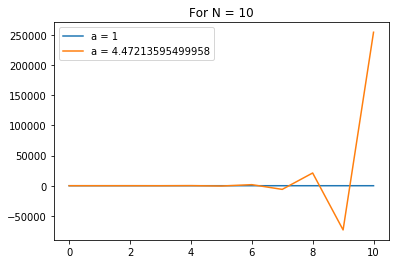

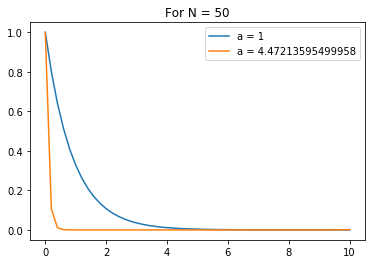

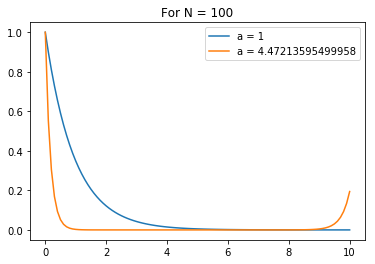

In [75]:
T = 10

def build_chart(N):
    a_s = [1, math.sqrt(20)]
    
    h = T / N
    xs = [i * h for i in range(0, N + 1)]
    
    for a in a_s:
        y1s = euler_method(N, a, T)
        pylab.plot(xs, y1s, label="a = " + str(a))
    pylab.title("For N = " + str(N))
    pylab.legend()
    pylab.show()
    
    
Ns = [10, 50, 100]

for i in Ns:
    build_chart(i)

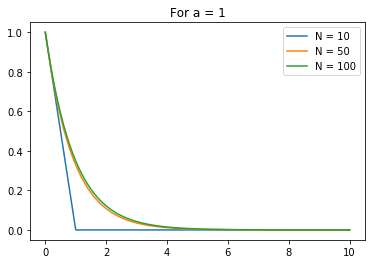

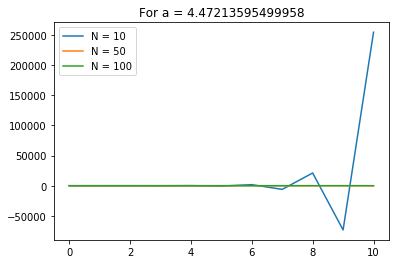

In [76]:
T = 10

def build_chart(a):
    Ns = [10, 50, 100]
    
    for N in Ns:
        h = T / N
        xs = [i * h for i in range(0, N + 1)]
        y1s = euler_method(N, a, T)
        pylab.plot(xs, y1s, label="N = " + str(N))
    pylab.title("For a = " + str(a))
    pylab.legend()
    pylab.show()
    
    
a_s = [1, math.sqrt(20)]

for a in a_s:
    build_chart(a)

Построим графики зависимости погрешности от N.
Для этого найдём точное решения при $a = 1$ и $a = \sqrt{20}$.

При $a = 1$ решение - $y(x) = e^{-x}$.

При $a = \sqrt(20)$ решение - $y(x) = e^{-\sqrt{20}x}$.

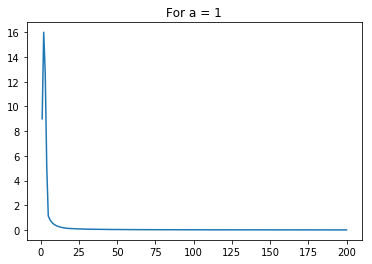

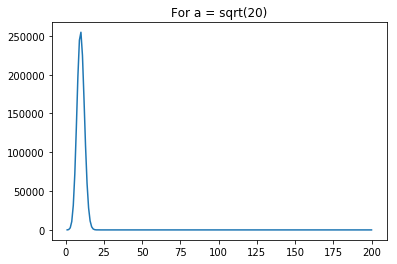

In [77]:
T = 10

Ns = [i for i in range(1, 201)]

errs_1 = [max(np.abs(euler_method(N, 1, T) - np.array([np.exp(-i * T / N) for i in range(0, N + 1)]))) for N in Ns]
errs_sqrt20 = [max(np.abs(euler_method(N, math.sqrt(20), T) - np.array([np.exp(- math.sqrt(20) * i * T / N) for i in range(0, N + 1)]))) for N in Ns]

pylab.plot(Ns, errs_1)
pylab.title("For a = 1")
pylab.show()

pylab.plot(Ns, errs_sqrt20)
pylab.title("For a = sqrt(20)")
pylab.show()
    

На каждом из графиков можно наблюдать скачок погрешности при небольших N. Это согласуется с графиками выше: например, при $a = \sqrt{20}$ и $N = 10$ на правом конце отрезка мы опять же вдим резкий скачок (поведение сильно отличается от экспоненты, которая является решением ДУ). Масштабируем график, рассмотрев промежуток, начинающийся после пика.

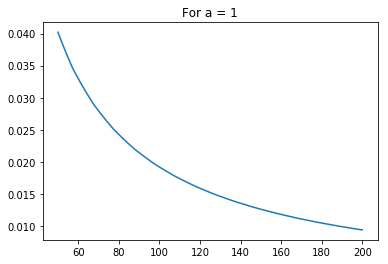

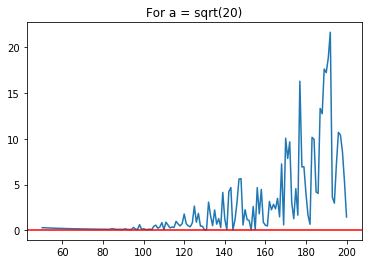

In [78]:
T = 10
eps = 10 ** (-3)

Ns = [i for i in range(50, 201)]

errs_1 = [max(np.abs(euler_method(N, 1, T) - np.array([np.exp(-i * T / N) for i in range(0, N + 1)]))) for N in Ns]
errs_sqrt20 = [max(np.abs(euler_method(N, math.sqrt(20), T) - np.array([np.exp(- math.sqrt(20) * i * T / N) for i in range(0, N + 1)]))) for N in Ns]

pylab.plot(Ns, errs_1)
pylab.title("For a = 1")
pylab.show()

pylab.plot(Ns, errs_sqrt20)
pylab.title("For a = sqrt(20)")
pylab.axhline(y=eps, color='r')
pylab.show()

Видим, что при $a = 1$ ошибка уменьшается с ростом N. При $a = \sqrt{20}$ такой тенденции не наблюдается.
Действительно, если построить графики решения уравнения при $a = \sqrt{20}$ для различных N, то можно заметить резкое увеличение значения функции на правом конце отрезка $[0; T].$ Скорее всего, это происходит из-за слишком малого значения аргумента экспоненты.

Рассмотрим случай $a = 1$ и поймём, для какого $N$ достигается требуемая точность $\varepsilon = 10^{-3}$.

In [79]:
n = 1

while True:
    err = max(np.abs(euler_method(n, 1, T) - np.array([np.exp(-i * T / n) for i in range(0, n + 1)])))
    if (err < eps):
        print(n)
        break
    n = n + 1
        

1844


Видим, что начная с $N = 1844$, точность $< \varepsilon$.

Для $a = \sqrt{20}$ ситуация хуже: при росте N погрешность возрастает. Рассмотрим участки, на котором график ближе всего к красной линии ($y = \varepsilon$). 

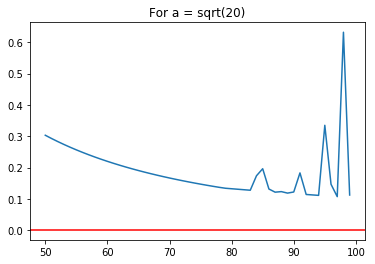

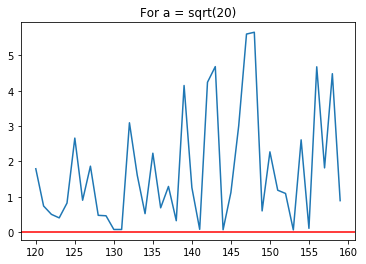

In [80]:
T = 10
eps = 10 ** (-3)

Ns1 = [i for i in range(50, 100)]
errs_sqrt20_1 = [max(np.abs(euler_method(N, math.sqrt(20), T) - np.array([np.exp(- math.sqrt(20) * i * T / N) for i in range(0, N + 1)]))) for N in Ns1]

pylab.plot(Ns1, errs_sqrt20_1)
pylab.title("For a = sqrt(20)")
pylab.axhline(y=eps, color='r')
pylab.show()

Ns2 = [i for i in range(120, 160)]
errs_sqrt20_2 = [max(np.abs(euler_method(N, math.sqrt(20), T) - np.array([np.exp(- math.sqrt(20) * i * T / N) for i in range(0, N + 1)]))) for N in Ns2]

pylab.plot(Ns2, errs_sqrt20_2)
pylab.title("For a = sqrt(20)")
pylab.axhline(y=eps, color='r')
pylab.show()

Видим, что график не опускается ниже $y = \varepsilon$.

Далее повторим задание для метода Рунге-Кутта 2-го порядка.

In [81]:
def runge_kutta_method(N, a, T):
    h = T / N
    xs = [0]
    y1s = [1]
    y2s = [-a]
    
    beta = 1 / 2
    
    for i in range(1, N + 1):
        xs.append(xs[i - 1] + h)
        y1s.append(y1s[i - 1] + h * ((1 - beta) * y2s[i - 1] + beta * (y2s[i - 1] + h / (2 * beta) * a ** 2 * y1s[i - 1])))
        y2s.append(y2s[i - 1] + h * ((1 - beta) * a ** 2 * y1s[i - 1] + beta * a ** 2 * (y1s[i - 1] + h / (2 * beta) * y2s[i - 1])))
        
    return np.array(y1s)

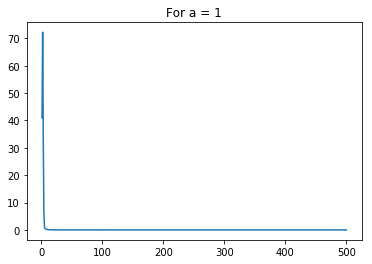

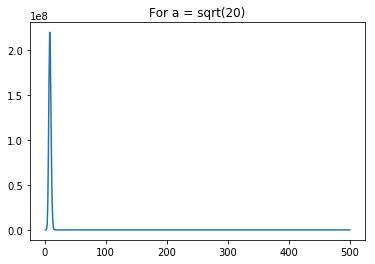

In [82]:
T = 10

Ns_runge = [i for i in range(1, 501)]

errs_1_runge = [max(np.abs(runge_kutta_method(N, 1, T) - np.array([np.exp(-i * T / N) for i in range(0, N + 1)]))) for N in Ns_runge]
errs_sqrt20_runge = [max(np.abs(runge_kutta_method(N, math.sqrt(20), T) - np.array([np.exp(- math.sqrt(20) * i * T / N) for i in range(0, N + 1)]))) for N in Ns_runge]

pylab.plot(Ns_runge, errs_1_runge)
pylab.title("For a = 1")
pylab.show()

pylab.plot(Ns_runge, errs_sqrt20_runge)
pylab.title("For a = sqrt(20)")
pylab.show()
    

Масштабируем:

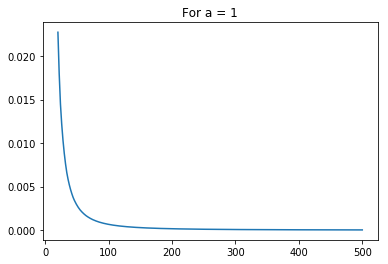

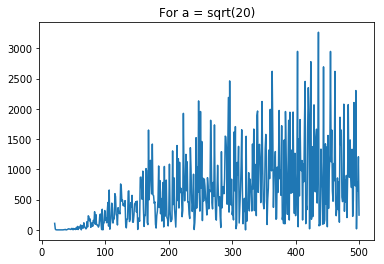

In [83]:
T = 10

Ns_runge = [i for i in range(20, 501)]

errs_1_runge = [max(np.abs(runge_kutta_method(N, 1, T) - np.array([np.exp(-i * T / N) for i in range(0, N + 1)]))) for N in Ns_runge]
errs_sqrt20_runge = [max(np.abs(runge_kutta_method(N, math.sqrt(20), T) - np.array([np.exp(- math.sqrt(20) * i * T / N) for i in range(0, N + 1)]))) for N in Ns_runge]

pylab.plot(Ns_runge, errs_1_runge)
pylab.title("For a = 1")
pylab.show()

pylab.plot(Ns_runge, errs_sqrt20_runge)
pylab.title("For a = sqrt(20)")
pylab.show()
    

Ситуация похожая. При $a = \sqrt{20}$ с ростом N происходит расхождение. Имеет смысл искать $N$ (с точностью лучшей, чем $\varepsilon$) только для $a = 1$.

In [84]:
n = 1

while True:
    err = max(np.abs(runge_kutta_method(n, 1, T) - np.array([np.exp(-i * T / n) for i in range(0, n + 1)])))
    if (err < eps):
        print(n)
        break
    n = n + 1
        

83


Как видно, уже с $N = 83$ получаем хорошую точность. Сравним результат с методом Эйлера для $a = 1$ и $a = \sqrt{20}$ в логарифмических координатах.

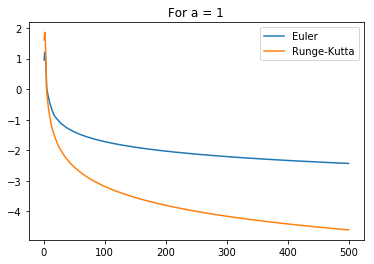

In [85]:
Ns_common = [i for i in range(1, 501)]

errs_1_euler = [np.log10(max(np.abs(euler_method(N, 1, T) - np.array([np.exp(-i * T / N) for i in range(0, N + 1)])))) for N in Ns_common]
errs_1_runge = [np.log10(max(np.abs(runge_kutta_method(N, 1, T) - np.array([np.exp(-i * T / N) for i in range(0, N + 1)])))) for N in Ns_common]

pylab.plot(Ns_common, errs_1_euler, label="Euler")
pylab.plot(Ns_common, errs_1_runge, label="Runge-Kutta")
pylab.title("For a = 1")
pylab.legend()
pylab.show()

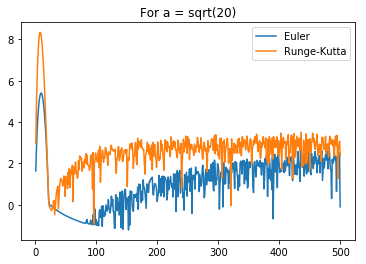

In [86]:
Ns_common = [i for i in range(1, 501)]

errs_sqrt20_euler = [np.log10(max(np.abs(euler_method(N, math.sqrt(20), T) - np.array([np.exp(- math.sqrt(20) * i * T / N) for i in range(0, N + 1)])))) for N in Ns_common]
errs_sqrt20_runge = [np.log10(max(np.abs(runge_kutta_method(N, math.sqrt(20), T) - np.array([np.exp(- math.sqrt(20) * i * T / N) for i in range(0, N + 1)])))) for N in Ns_common]

pylab.plot(Ns_common, errs_sqrt20_euler, label="Euler")
pylab.plot(Ns_common, errs_sqrt20_runge, label="Runge-Kutta")
pylab.title("For a = sqrt(20)")
pylab.legend()
pylab.show()

Как видим из графиков, при $a = 1$ погрешность метода Рунге меньше, чем метода Эйлера. А при $a = \sqrt{20}$ всё наоборот.